<a href="https://colab.research.google.com/github/maushmirajesh/Nissan-Industrial-Elective-Microproject/blob/main/MicroProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

This is a spam classification project that uses Naive Bayes to classify text messages as spam or ham based on input given by user

In [ ]:
#Load the dataset
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:

df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns = {'v1':'labels', 'v2':'message'}, inplace=True)
df.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(5169, 2)

In [ ]:
df['label'] = df['labels'].map({'ham': 0, 'spam': 1})
df.head()

,labels,message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df.drop(['labels'], axis=1, inplace=True)
df.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
import string

def preprocess_text(message):

    # Check characters to see if they are in punctuation
    without_punc = [char for char in message if char not in string.punctuation]

    # Join the characters again to form the string.
    without_punc = ''.join(without_punc)

    # Now just remove any stopwords
    return [word for word in without_punc.split() if word.lower() not in stopwords.words('english')]
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
df['message'].head().apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

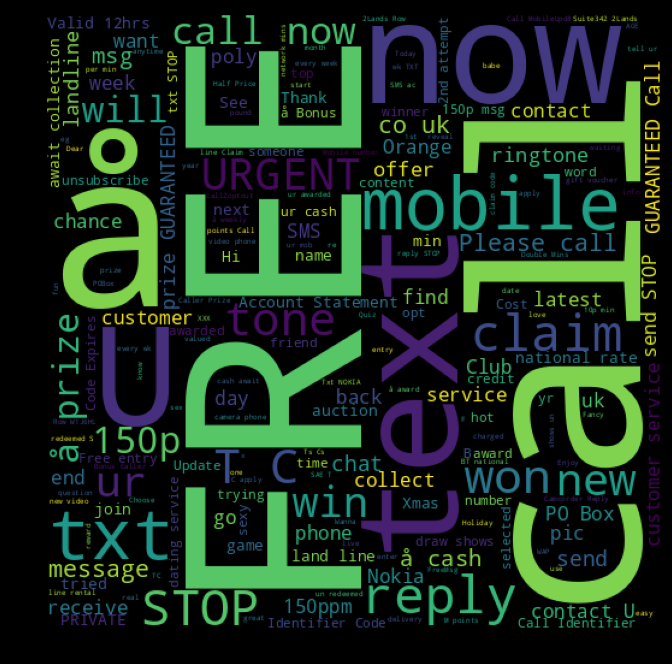

In [ ]:
from wordcloud import WordCloud

spam_words = ' '.join(list(df[df['label'] == 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.show()

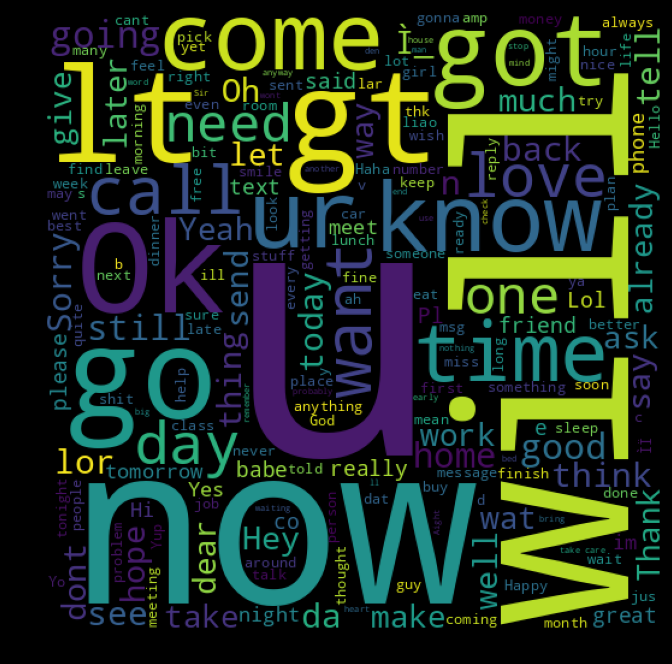

In [ ]:
from wordcloud import WordCloud

ham_words = ' '.join(list(df[df['label'] == 0]['message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
x = df['message']
y = df['label']
cv = CountVectorizer()
x= cv.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(x_train, y_train)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(x_train, y_train)

In [ ]:
# print the predictions
print(classifier.predict(x_test))

# print the actual values
print(y_test.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:
def sms(text):

    # creating a list of labels
    lab = ['not spam','spam']

    # perform tokenization
    x = cv.transform(text).toarray()

    # predict the text
    p = classifier.predict(x)

    # convert the words in string with the help of list
    s = [str(i) for i in p]
    a = int("".join(s))

    # show out the final result
    res = str("This message is looking: "+ lab[a])
    print(res)

In [ ]:
check = input()
sms([check])

	WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
This message is looking: spam
